# Statistical Tests

## 1. Introduction

Statistical tests are an important part of understanding and interpreting of the data. In this work, some statistical analysis and tests are presented using Google's mobility report during COVID19 pandemy and related data from other various sources. 

Data collection and data cleaning process is explained here: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-collection-merging-and-cleaning/mobility-dataframe-preparation.ipynb

This data is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb

Python Data Visualization: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-python-jupyter/mobility-data-analysis-visualization.ipynb

<li>This dataframe is used in machine learning algorithm studies like regression and clustering.

https://github.com/DrFarukAydin/data-science-portfolio/blob/main/machine-learning/mobility-cluster.ipynb

<br><br>

## 2. Importing Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
df = pd.read_csv("../Traffic Studies/final_df.csv", low_memory=False)

In [3]:
df.head()

,Unnamed: 0,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,...,ilce_kademe,il_skor,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],rain,MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX
0,0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10430715 entries, 0 to 10430714
Data columns (total 36 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   Unnamed: 0                                          int64  
 1   country_region_code                                 object 
 2   country_region                                      object 
 3   sub_region_1                                        object 
 4   sub_region_2                                        object 
 5   metro_area                                          object 
 6   iso_3166_2_code                                     object 
 7   census_fips_code                                    float64
 8   place_id                                            object 
 9   date                                                object 
 10  retail_and_recreation_percent_change_from_baseline  float64
 11  grocery_and_pharmacy_percent_change

In [5]:
df.drop("Unnamed: 0", axis=1, inplace=True)

In [6]:
df["date"] = pd.to_datetime(df["date"])

In [7]:
df["year"] = df["date"].apply(lambda x: x.year)
df["month"] = df["date"].apply(lambda x: x.month)
df["day"] = df["date"].apply(lambda x: x.day)

In [8]:
mobility_cols = ['retail_and_recreation_percent_change_from_baseline',
                 'grocery_and_pharmacy_percent_change_from_baseline',
                 'parks_percent_change_from_baseline',
                 'transit_stations_percent_change_from_baseline',
                 'workplaces_percent_change_from_baseline',
                 'residential_percent_change_from_baseline', 
                 'mean_percent_change']

To fasten computation processes, we can simplify the dataframe by grouping by country.

In [9]:
df_bycountry = df.groupby(["country_region", "date"], as_index=False).mean()

In [10]:
df_bycountry.head()

,country_region,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,...,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX,year,month,day
0,Afghanistan,2020-02-15,NaN,-11.0,-11.0,-7.0,-2.0,-33.5,5.5,516.747871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.0,15.0
1,Afghanistan,2020-02-16,NaN,1.5,10.0,0.0,10.0,3.0,-0.5,516.747871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.0,16.0
2,Afghanistan,2020-02-17,NaN,3.5,11.0,-0.5,9.5,4.5,-1.5,516.747871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.0,17.0
3,Afghanistan,2020-02-18,NaN,1.0,4.5,3.0,8.5,5.0,-0.5,516.747871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.0,18.0
4,Afghanistan,2020-02-19,NaN,-2.5,2.5,-2.0,-0.5,3.0,1.5,516.747871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.0,2.0,19.0


<br><br><br>

## 3. Statistical Analysis

### 3.1. Selection of Statistical Test

I have prepared the following flowchart to select proper statistical test for this work.

<img src='statistical-test-flowchart.png'/>

<b>Source:</b> Dr. Ömer Faruk Aydın

<br><br>

### 3.2. Determination of Data Distribution

In [22]:
df[mobility_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
retail_and_recreation_percent_change_from_baseline,6459698.0,-9.552462,30.139092,-100.0,-25.0,-8.0,7.000000,741.0
grocery_and_pharmacy_percent_change_from_baseline,6161319.0,11.788329,33.319320,-100.0,-5.0,7.0,25.000000,1064.0
parks_percent_change_from_baseline,4918818.0,5.636343,61.011146,-100.0,-31.0,-5.0,28.000000,1327.0
transit_stations_percent_change_from_baseline,5172388.0,-14.804352,37.065404,-100.0,-39.0,-18.0,4.000000,794.0
workplaces_percent_change_from_baseline,10059680.0,-11.023142,25.413069,-100.0,-25.0,-13.0,1.000000,450.0
residential_percent_change_from_baseline,6400246.0,6.816356,7.342154,-77.0,2.0,6.0,10.000000,75.0
mean_percent_change,10430715.0,-4.027263,24.349539,-100.0,-17.0,-4.5,7.166667,667.5


/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


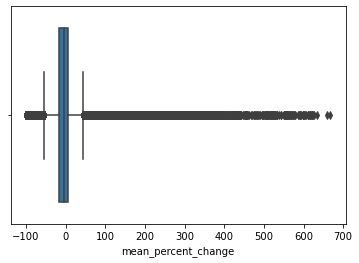

In [25]:
sns.boxplot(df["mean_percent_change"]);

In [ ]:
sns.boxplot(df["mean_percent_change"])
plt.xlim(-70,70);

/Users/sevdeaydin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


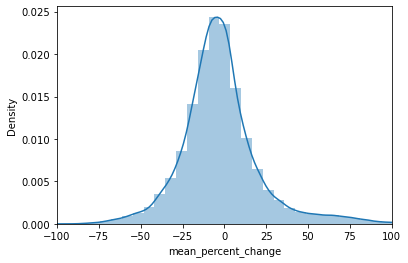

In [11]:
sns.distplot(df_bycountry["mean_percent_change"])
plt.xlim(-100,100);

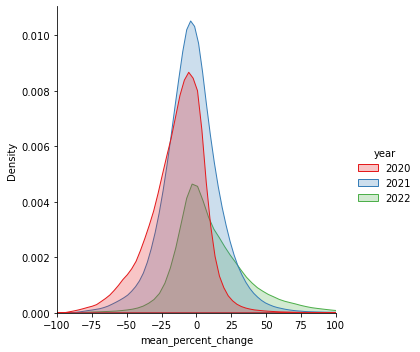

In [36]:
sns.displot(df, x="mean_percent_change", hue="year", kind="kde", fill=True, palette="Set1")
plt.xlim(-100,100);

As seen in the Distribution Plot, the mobility change is normally distributed.

<br><br>

### 3.3. Implementation of Statistical Tests

#### 3.3.1. Weather (Precipitation)

##### 3.3.1.1. Data Analysis

We can compare the mean mobility change values of rainy days and clear days. Independent two sample t-test and/or ANOVA can be applied to compare two groups of data if the normal distribution and homogeneity of variance assumptions are satisfied. If these assumptions fail, then Mann-Whitney U test and/or Krustal Wallis H can be applied. First, we start with data manipulation and visualization.

In [25]:
df_bursa = df[df["sub_region_1"] == "Bursa"].groupby("date", as_index=False).mean()

In [26]:
df_bursa.columns

Index(['date', 'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 'gdp_per_cap_2020',
       'new_cases_per_million', 'total_cases_per_million',
       'new_deaths_per_million', 'hosp_patients_per_million',
       'mean_percent_change', 'ilce_skor', 'ilce_kademe', 'il_skor',
       'il_kademe', 'Kurşunsuz Benzin', 'Motorin', 'precipitation [mm/day]',
       'MINIMUM_TRAFFIC_INDEX', 'MAXIMUM_TRAFFIC_INDEX',
       'AVERAGE_TRAFFIC_INDEX', 'year', 'month', 'day'],
      dtype='object')

In [27]:
df_bursa = df_bursa[['date','retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',
       'transit_stations_percent_change_from_baseline',
       'workplaces_percent_change_from_baseline',
       'residential_percent_change_from_baseline', 
       'mean_percent_change', 'precipitation [mm/day]']]

In [28]:
df_bursa ["precipitation_bool"] = df_bursa["precipitation [mm/day]"].apply(lambda x: 1 if x>0 else 0)

In [29]:
df_bursa.head()

,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,mean_percent_change,precipitation [mm/day],precipitation_bool
0,2020-02-15,-0.785714,-0.076923,-10.454545,-7.125,7.928571,1.000000,-0.764286,11.4,1
1,2020-02-16,-0.071429,5.750000,-2.272727,-2.250,7.250000,1.000000,2.089286,0.0,0
2,2020-02-17,3.846154,3.692308,9.444444,2.875,8.500000,-1.333333,4.672619,0.0,0
3,2020-02-18,4.615385,4.692308,16.777778,1.750,8.428571,-2.083333,5.379762,0.0,0
4,2020-02-19,-0.923077,-0.230769,7.333333,-3.375,8.000000,-1.750000,1.686905,0.0,0


In [31]:
df_bursa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 866 entries, 0 to 865
Data columns (total 10 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                866 non-null    datetime64[ns]
 1   retail_and_recreation_percent_change_from_baseline  866 non-null    float64       
 2   grocery_and_pharmacy_percent_change_from_baseline   866 non-null    float64       
 3   parks_percent_change_from_baseline                  866 non-null    float64       
 4   transit_stations_percent_change_from_baseline       866 non-null    float64       
 5   workplaces_percent_change_from_baseline             866 non-null    float64       
 6   residential_percent_change_from_baseline            866 non-null    float64       
 7   mean_percent_change                                 866 non-null    float64       
 8   precipitat

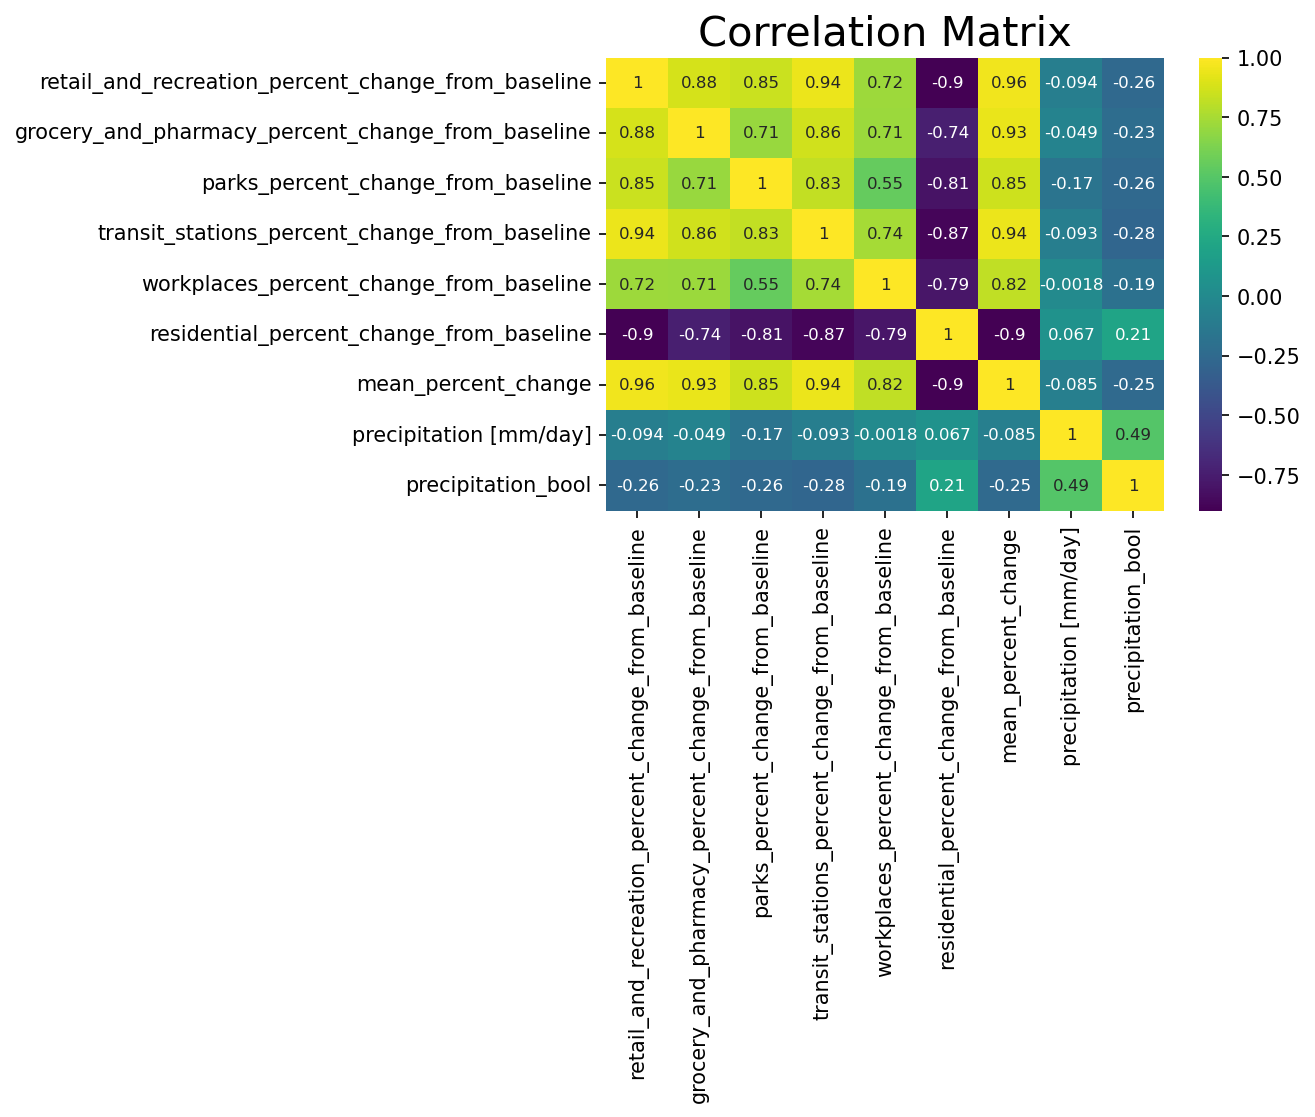

In [32]:
plt.figure(dpi=150)
sns.heatmap(df_bursa.corr(), 
            cmap="viridis", annot=True, annot_kws={"fontsize":8})

plt.title("Correlation Matrix", fontsize=20);

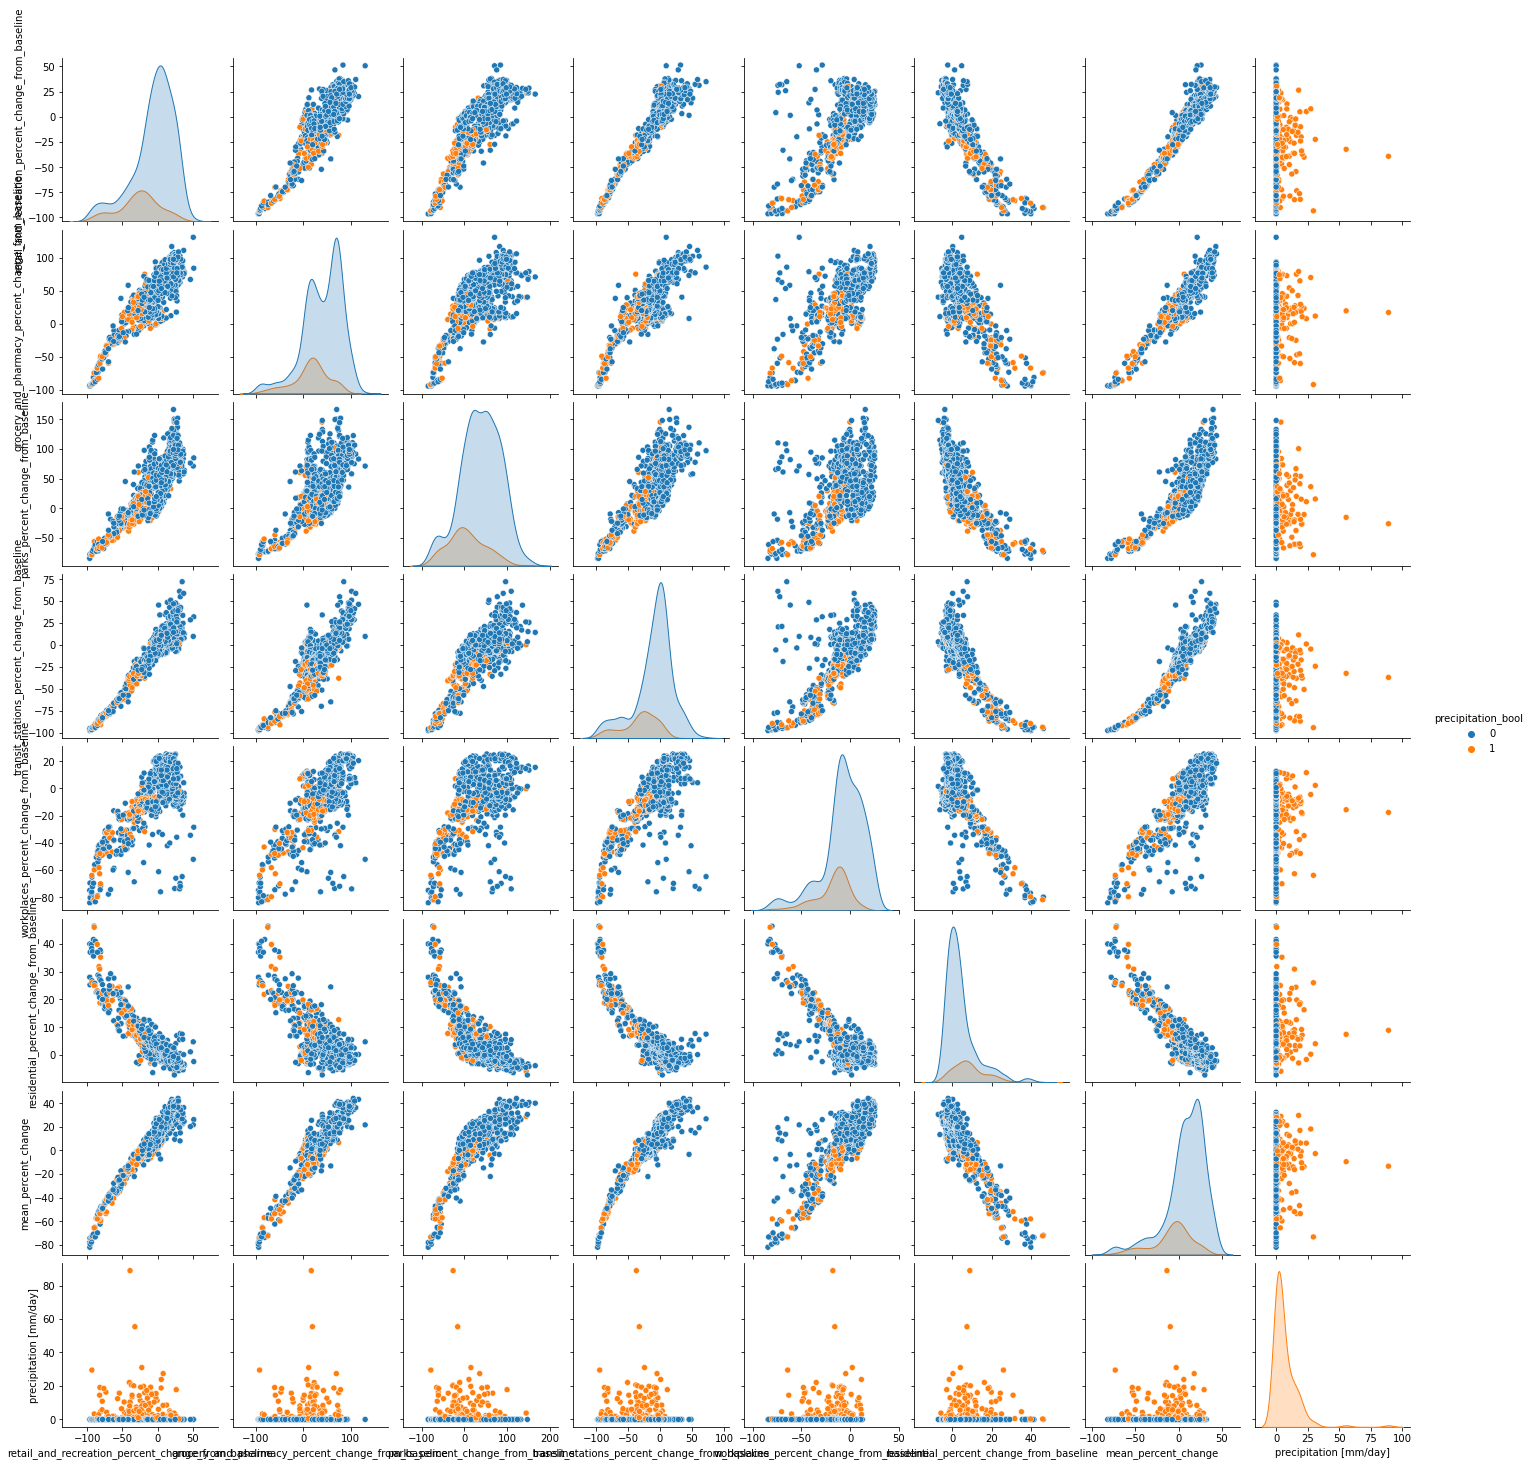

In [33]:
sns.pairplot(data = df_bursa, hue="precipitation_bool");

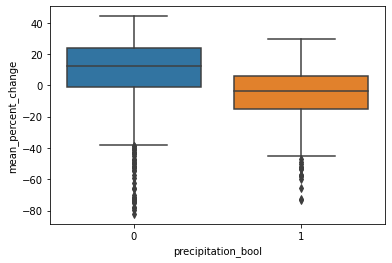

In [36]:
sns.boxplot(data=df_bursa, y = "mean_percent_change", x="precipitation_bool");

<br><br><br>

##### 3.3.1.2. Checking Normality and Homogenity of Variances

<b>Checking for normal distribution:</b>

In [106]:
stats.shapiro(df_bursa[df_bursa["precipitation_bool"] == 1]["mean_percent_change"])

ShapiroResult(statistic=0.9287019968032837, pvalue=8.071091883721238e-07)

In [107]:
stats.shapiro(df_bursa[df_bursa["precipitation_bool"] == 0]["mean_percent_change"])

ShapiroResult(statistic=0.8895995616912842, pvalue=3.2850374379582654e-22)

In [144]:
stats.shapiro(df_bursa[df_bursa["precipitation_bool"] == 0]["residential_percent_change_from_baseline"])

ShapiroResult(statistic=0.8048670887947083, pvalue=1.688912246145061e-28)

The result of the Shapiro Test indicates that we reject the null hypothesis because the p values are smaller than 0.05. Thus, we can conclude that the values are not normally distributed.

<b>Checking for homogeneity of variances:</b>

In [123]:
stats.levene(df_bursa[df_bursa["precipitation_bool"] == 0]["mean_percent_change"], 
             df_bursa[df_bursa["precipitation_bool"] == 1]["mean_percent_change"])

LeveneResult(statistic=0.04166427123865605, pvalue=0.8383091404427105)

The Levene Test Results indicates that we cannot reject the null hypothesis. Therefore, we can accept homogeneity of variances assumption.

As a result of the normality tests, it is more appropriate to use <b>nonparametric tests</b> for comparison.<br><br>

##### 3.3.1.3. Nonparametric Independent Two Sample Test (Mann-Whitney U)

In [141]:
stats.mannwhitneyu(df_bursa[df_bursa["precipitation_bool"] == 0]["mean_percent_change"],
                  df_bursa[df_bursa["precipitation_bool"] == 1]["mean_percent_change"])

MannwhitneyuResult(statistic=77772.5, pvalue=5.5460635971505865e-18)

Mann-Whitney U test indicates that we can reject the null hypothesis, so we can conclude that the difference caused by precipitation is statistically significant.

<br><br>

##### 3.3.1.4. Kruskal Wallis H & Dunn Tests

In [146]:
stats.kruskal(df_bursa[df_bursa["precipitation_bool"] == 1]["mean_percent_change"], 
               df_bursa[df_bursa["precipitation_bool"] == 0]["mean_percent_change"])

KruskalResult(statistic=74.67930473115031, pvalue=5.537355547623716e-18)

<br>Similar to Mann-Whitney U test, Kruskal Wallis H test indicates that we should reject the null hypothesis because p value is smaller than 0.05. In other words, the difference is statistically significant with 95% confidence. 

<br><br>

#### 3.3.2. City Development Index

##### 3.3.2.1. Data Analysis

In [42]:
df_tr = df[df["country_region"] == "Turkey"]

<b>Note:</b> 'il_kademe' refers to the development level of the cities, where 1 is used for the most deeloped cities. Similarly, 'ilce_kademe' is the development level of the counties.

In [62]:
df_tr_city = df_tr.groupby(["sub_region_1","date"], as_index=False).mean()

In [64]:
df_tr_city = df_tr_city[~df_tr_city["il_kademe"].isnull()]

In [66]:
df_tr_city.head()

,sub_region_1,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,gdp_per_cap_2020,...,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX,year,month,day
0,Adana,2020-02-15,NaN,0.000000,1.714286,-12.000000,-10.800000,7.428571,0.833333,8536.43332,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,15.0
1,Adana,2020-02-16,NaN,0.000000,3.285714,-5.857143,-11.800000,6.142857,1.400000,8536.43332,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,16.0
2,Adana,2020-02-17,NaN,2.857143,2.571429,6.285714,-6.666667,7.428571,-1.000000,8536.43332,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,17.0
3,Adana,2020-02-18,NaN,5.714286,3.142857,6.428571,-3.833333,9.285714,-2.285714,8536.43332,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,18.0
4,Adana,2020-02-19,NaN,-0.857143,0.285714,6.142857,-1.166667,10.714286,-2.285714,8536.43332,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,19.0


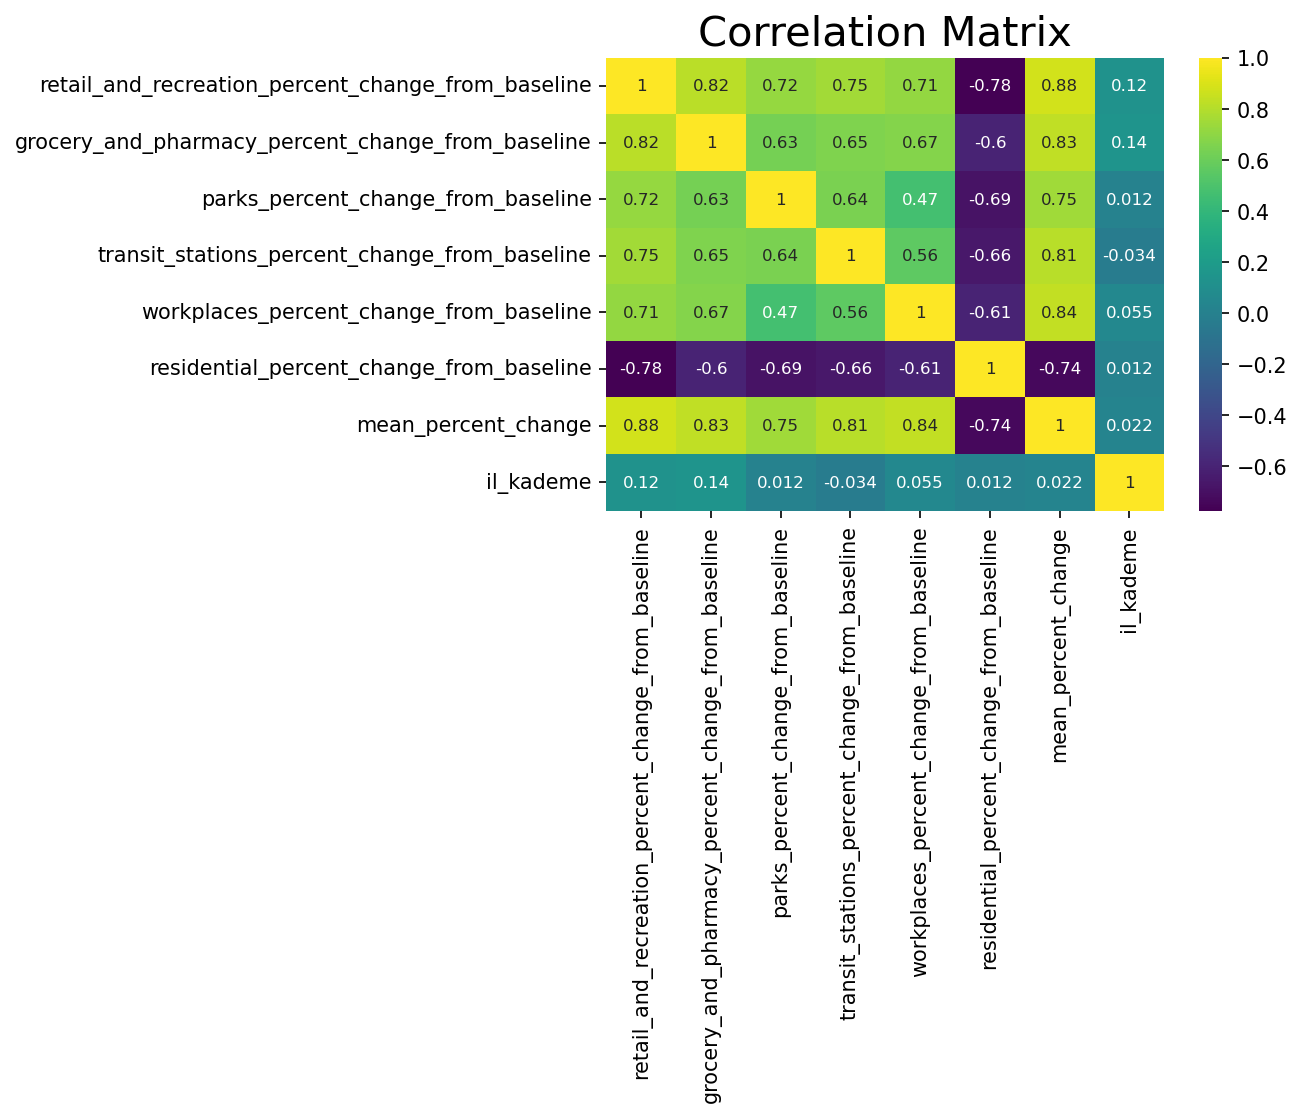

In [65]:
plt.figure(dpi=150)
sns.heatmap(df_tr_city[['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline', 
                  'mean_percent_change', 
                  'il_kademe']].corr(), 
            cmap="viridis", annot=True, annot_kws={"fontsize":8})

plt.title("Correlation Matrix", fontsize=20);

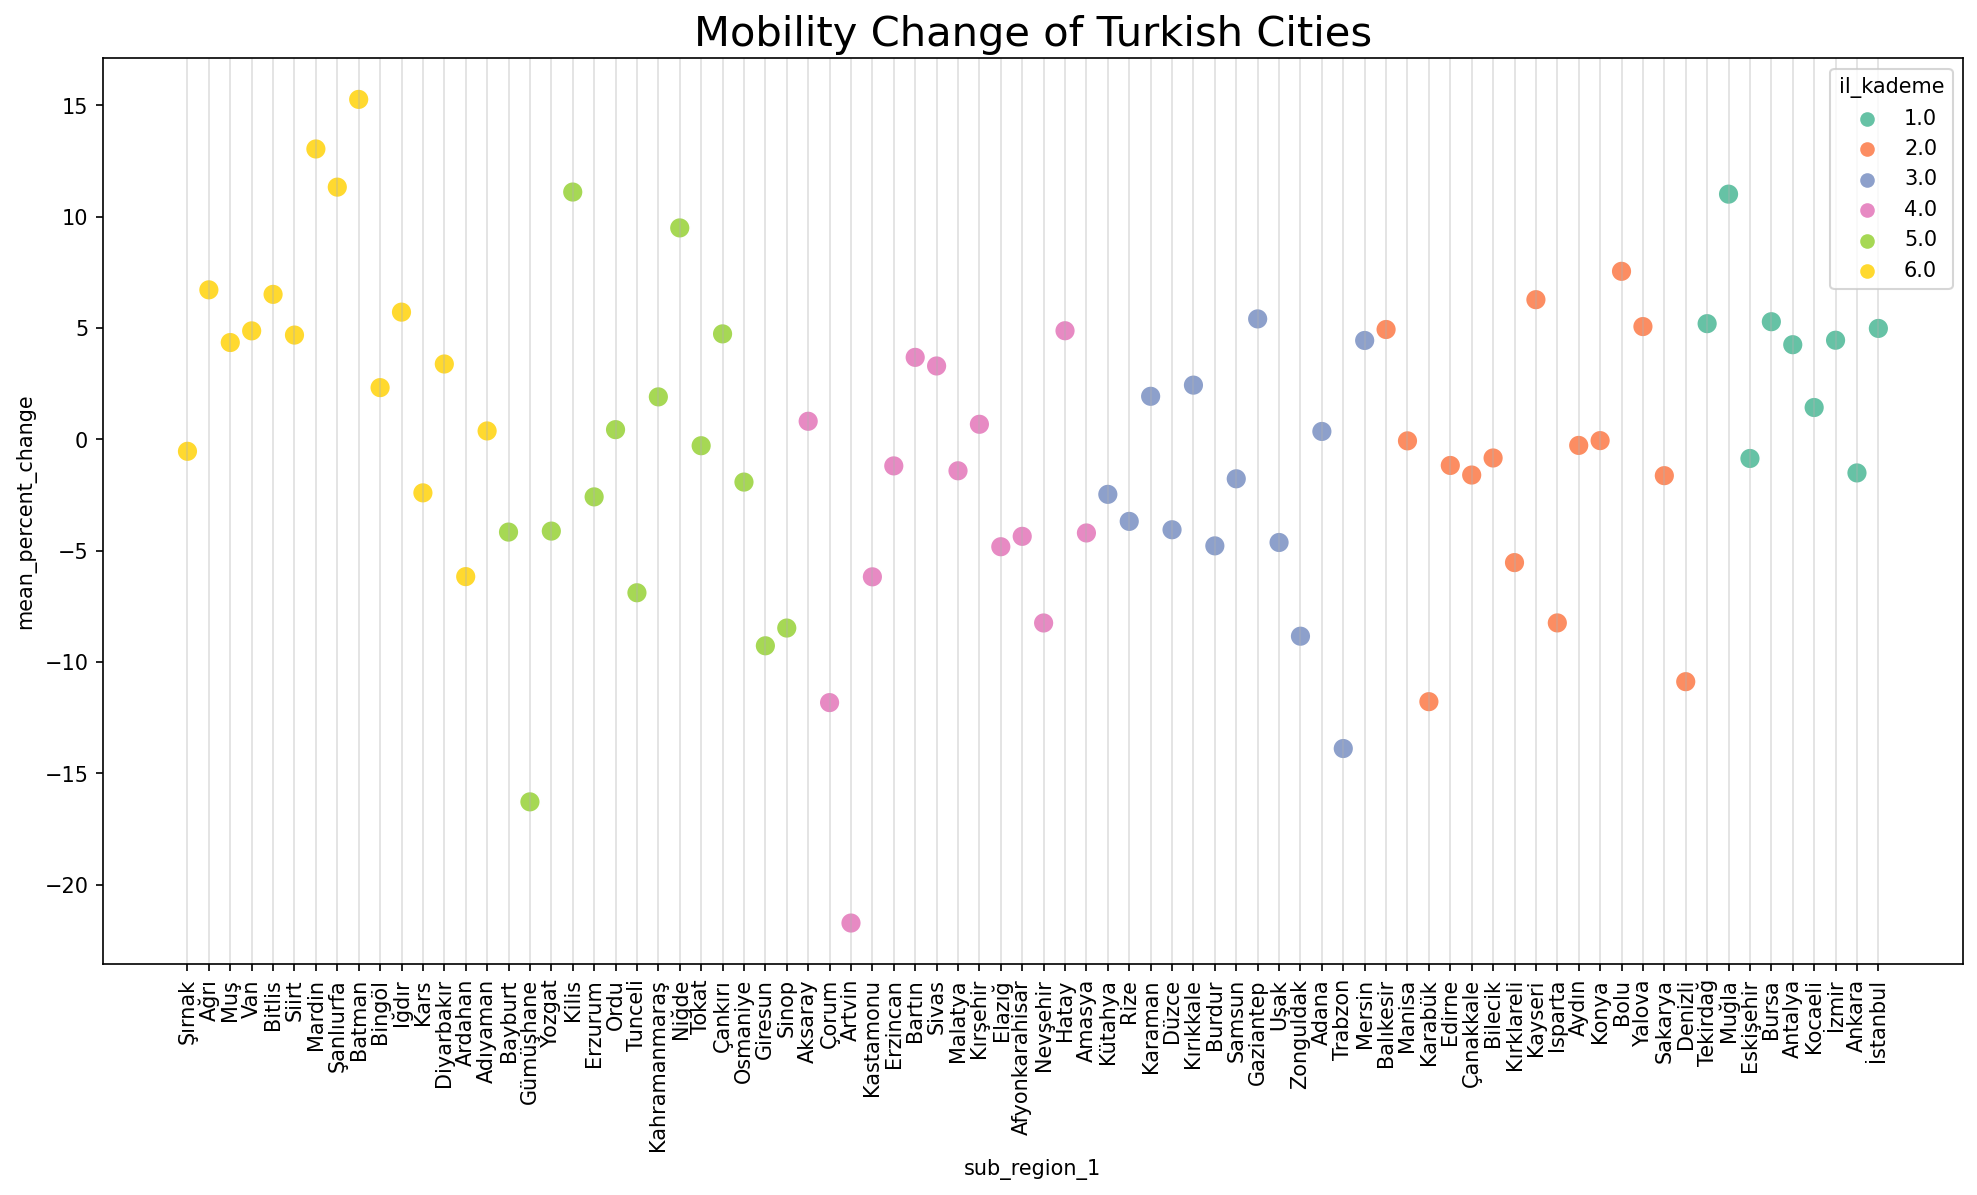

In [67]:
plt.figure(figsize=(16,8),dpi=150)

sns.scatterplot(data=df_tr_city.groupby(["sub_region_1","il_kademe"]).mean().sort_values("il_skor"), 
                x="sub_region_1",y="mean_percent_change", hue="il_kademe", palette="Set2", s=100)

plt.grid(axis="x", alpha=0.4)
plt.xticks(rotation=90)


plt.title("Mobility Change of Turkish Cities", fontsize=20);


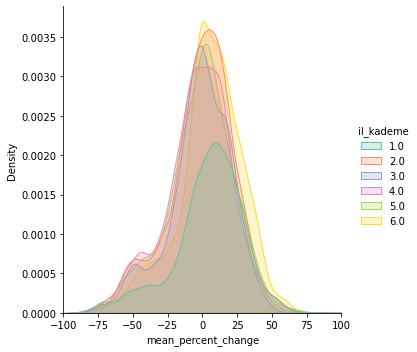

In [77]:
sns.displot(df_tr_city, x="mean_percent_change", hue="il_kademe", kind="kde", fill=True, palette="Set2")
plt.xlim(-100,100);

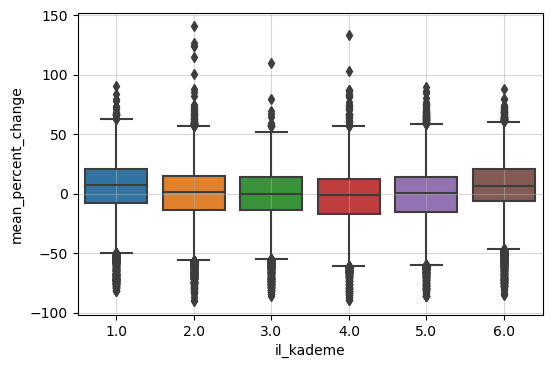

In [86]:
plt.figure(dpi=100)
sns.boxplot(data = df_tr_city, x=df_tr_city["il_kademe"], y=df_tr_city["mean_percent_change"])
plt.grid(alpha=0.5)

The correlation matrix and the above figures show that there is no significant relationship between city development index and the mobility change. We can make ANOVA to check statistical significance.<br><br>

##### 3.3.2.2. Checking Normality and Homogenity of Variances

<b>Checking for normal distribution:</b>

In [116]:
for i in range(1,7):
    print(stats.shapiro(df_tr_city[df_tr_city["il_kademe"] == i]["mean_percent_change"]))

ShapiroResult(statistic=0.9603062272071838, pvalue=1.0352793054431749e-41)
ShapiroResult(statistic=0.9781515002250671, pvalue=2.4727592961168587e-40)
ShapiroResult(statistic=0.9714627861976624, pvalue=2.5083242511414226e-42)
ShapiroResult(statistic=0.984894335269928, pvalue=8.583534136456231e-34)
ShapiroResult(statistic=0.9876006245613098, pvalue=5.79070146311114e-31)
ShapiroResult(statistic=0.9777860641479492, pvalue=2.3725804689022775e-40)


The result of the Shapiro Test indicates that we reject the null hypothesis because the p values are smaller than 0.05. Thus, we can conclude that the values are not normally distributed.

<b>Checking for homogeneity of variances:</b>

In [122]:
stats.levene(df_tr_city[df_tr_city["il_kademe"] == 1]["mean_percent_change"], 
             df_tr_city[df_tr_city["il_kademe"] == 2]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 3]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 4]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 5]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 6]["mean_percent_change"])

LeveneResult(statistic=9.594090249592753, pvalue=3.6281850095871736e-09)

The Levene Test Results indicates that we reject the null hypothesis. Therefore, we cannot accept homogeneity of variances assumption.

As a result of the normality and homogenity tests, it is more appropriate to use nonparametric tests for comparison.

##### 3.3.2.3. Kruskal Wallis H & Dunn Tests

In [147]:
stats.kruskal(df_tr_city[df_tr_city["il_kademe"] == 1]["mean_percent_change"], 
             df_tr_city[df_tr_city["il_kademe"] == 2]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 3]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 4]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 5]["mean_percent_change"],
            df_tr_city[df_tr_city["il_kademe"] == 6]["mean_percent_change"])

KruskalResult(statistic=1361.9677769997645, pvalue=2.395963964503206e-292)

<br>Kruskal Wallis H test indicates that we should reject the null hypothesis because p value is smaller than 0.05. In other words, the difference is statistically significant with 95% confidence. 

We can now apply Dunn Test to find the relationship between groups.

In [149]:
#pip install scikit-posthocs

Note: you may need to restart the kernel to use updated packages.


In [150]:
import scikit_posthocs as sp

In [157]:
def _color_red_or_green(val):
    color = 'red' if val < 0.05 else 'green'
    return 'color: %s' % color

In [158]:
sp.posthoc_dunn(df_tr_city, val_col='mean_percent_change', group_col='il_kademe').style.applymap(_color_red_or_green)

,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.463487
2.000000,0.000000,1.000000,0.000321,0.000000,0.004114,0.000000
3.000000,0.000000,0.000321,1.000000,0.000003,0.445880,0.000000
4.000000,0.000000,0.000000,0.000003,1.000000,0.000000,0.000000
5.000000,0.000000,0.004114,0.445880,0.000000,1.000000,0.000000
6.000000,0.463487,0.000000,0.000000,0.000000,0.000000,1.000000


Based on the result of Dunn Test, we can conclude that we reject the null hypothesis for all pairs except 1-6 and 3-5, so the difference between these pairs are statistically significant with 95% confidence.

<br><br>

#### 3.3.3. County Development Index

##### 3.3.3.1. Data Analysis

<b>Note:</b> 'il_kademe' refers to the development level of the cities, where 1 is used for the most deeloped cities. Similarly, 'ilce_kademe' is the development level of the counties.

In [91]:
df_tr_county = df_tr.groupby(["sub_region_1","sub_region_2","date"], as_index=False).mean()

In [93]:
df_tr_county = df_tr_county[~df_tr_county["ilce_kademe"].isnull()]

In [94]:
df_tr_county.head()

,sub_region_1,sub_region_2,date,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,...,il_kademe,Kurşunsuz Benzin,Motorin,precipitation [mm/day],MINIMUM_TRAFFIC_INDEX,MAXIMUM_TRAFFIC_INDEX,AVERAGE_TRAFFIC_INDEX,year,month,day
0,Adana,Ceyhan,2020-02-15,NaN,1.0,6.0,-20.0,-26.0,6.0,-1.0,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,15.0
1,Adana,Ceyhan,2020-02-16,NaN,-4.0,1.0,-18.0,-16.0,11.0,NaN,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,16.0
2,Adana,Ceyhan,2020-02-17,NaN,5.0,-3.0,-2.0,-7.0,10.0,-1.0,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,17.0
3,Adana,Ceyhan,2020-02-18,NaN,6.0,-5.0,-5.0,-2.0,7.0,-2.0,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,18.0
4,Adana,Ceyhan,2020-02-19,NaN,-2.0,2.0,10.0,2.0,10.0,-2.0,...,3.0,6.66,6.37,NaN,NaN,NaN,NaN,2020.0,2.0,19.0


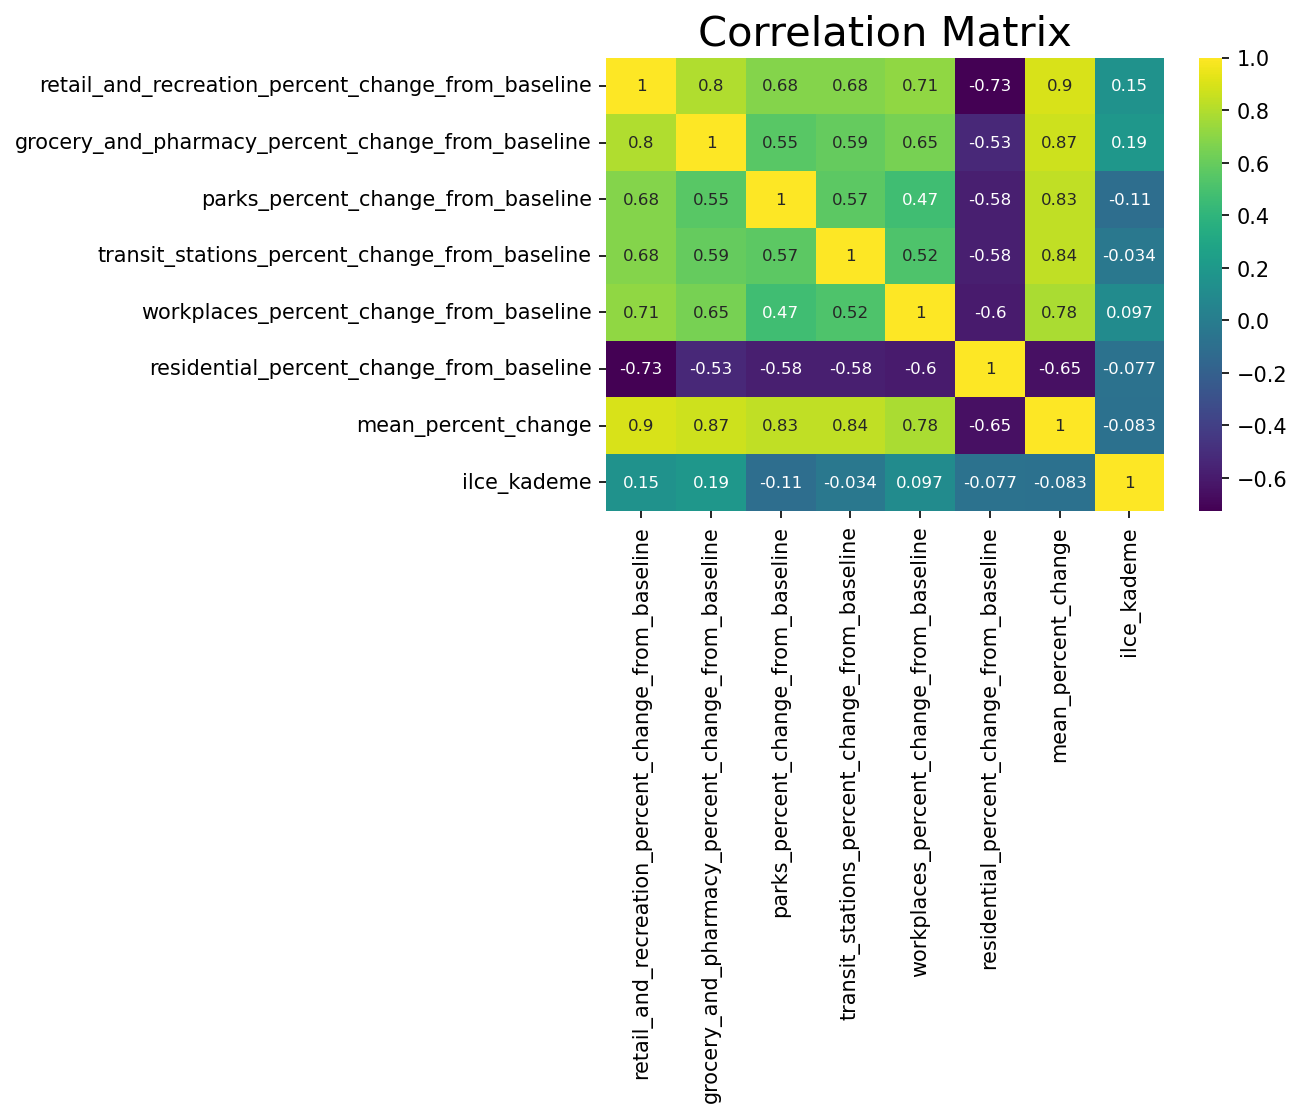

In [95]:
plt.figure(dpi=150)
sns.heatmap(df_tr_county[['retail_and_recreation_percent_change_from_baseline',
                  'grocery_and_pharmacy_percent_change_from_baseline',
                  'parks_percent_change_from_baseline',
                  'transit_stations_percent_change_from_baseline',
                  'workplaces_percent_change_from_baseline',
                  'residential_percent_change_from_baseline', 
                  'mean_percent_change', 
                  'ilce_kademe']].corr(), 
            cmap="viridis", annot=True, annot_kws={"fontsize":8})

plt.title("Correlation Matrix", fontsize=20);

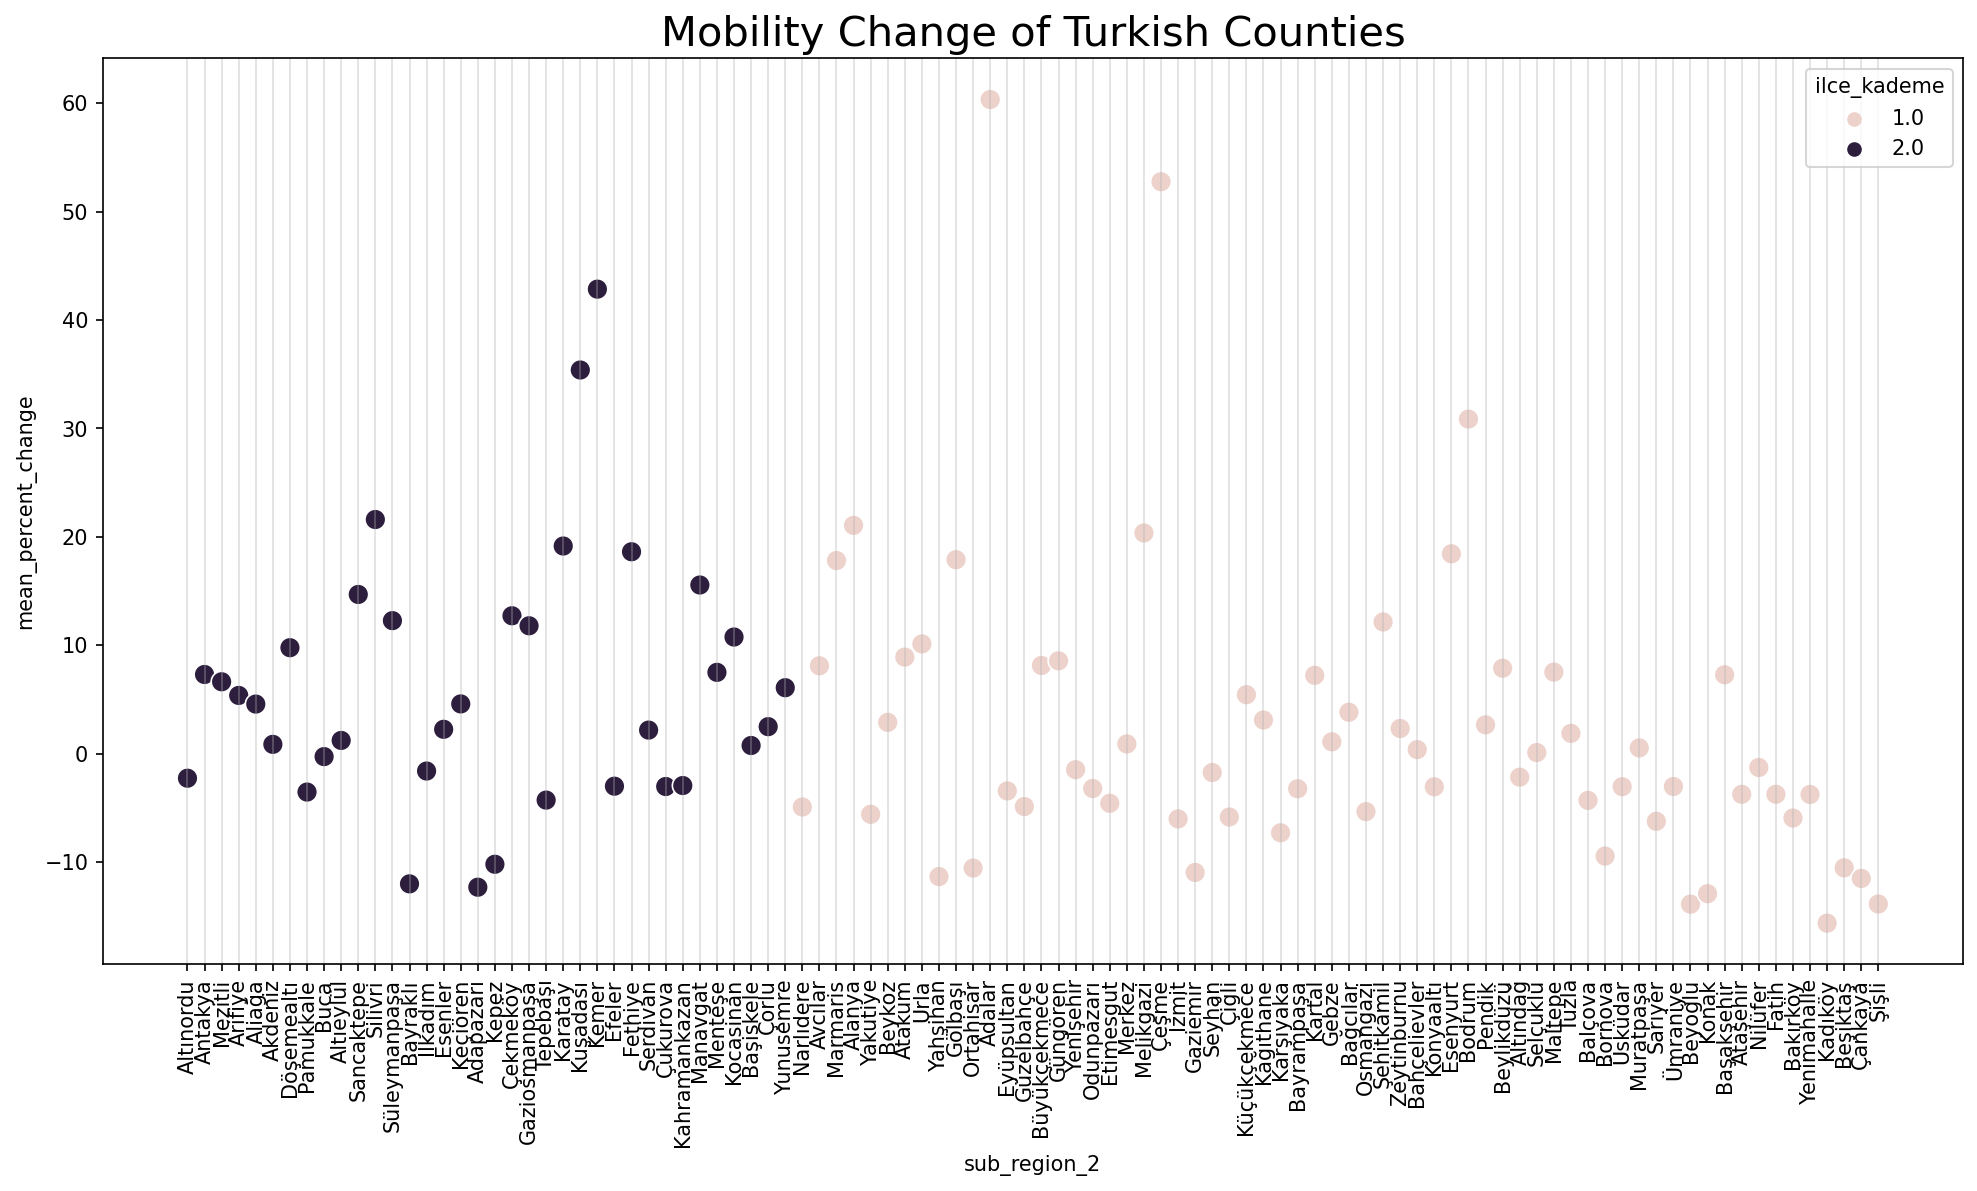

In [96]:
plt.figure(figsize=(16,8),dpi=150)

sns.scatterplot(data=df_tr_county.groupby(["sub_region_2","ilce_kademe"]).mean().sort_values("ilce_skor").iloc[-100:,:], 
                x="sub_region_2",y="mean_percent_change", hue="ilce_kademe", s=100)

plt.grid(axis="x", alpha=0.4)
plt.xticks(rotation=90)

plt.title("Mobility Change of Turkish Counties", fontsize=20);

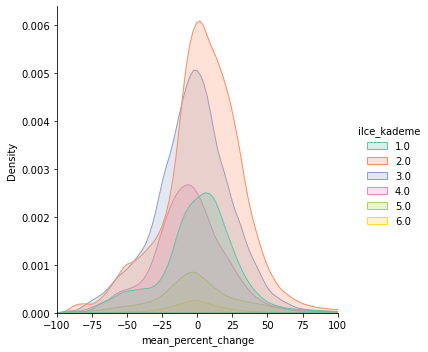

In [97]:
sns.displot(df_tr_county, x="mean_percent_change", hue="ilce_kademe", kind="kde", fill=True, palette="Set2")
plt.xlim(-100,100);

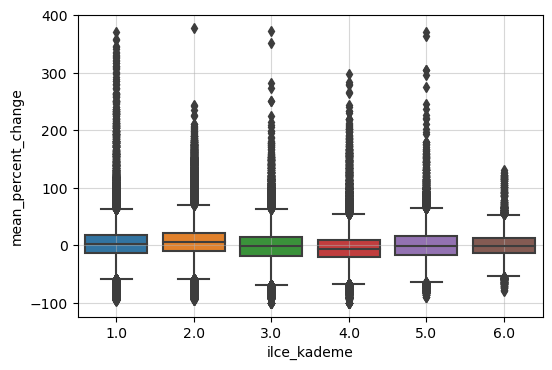

In [98]:
plt.figure(dpi=100)
sns.boxplot(data = df_tr_county, x=df_tr_county["ilce_kademe"], y=df_tr_county["mean_percent_change"])
plt.grid(alpha=0.5)

The correlation matrix and the above figures show no clear idea about the significant relationship between county development index and the mobility change. We can make ANOVA to check statistical significance.<br><br>

##### 3.3.3.2. Checking Normality and Homogenity of Variances

<b>Checking for normal distribution:</b>

In [139]:
for i in range(1,7):
    print(stats.shapiro(df_tr_county[df_tr_county["ilce_kademe"] == i]["mean_percent_change"]))

ShapiroResult(statistic=0.8979974985122681, pvalue=0.0)
ShapiroResult(statistic=0.9696475863456726, pvalue=0.0)
ShapiroResult(statistic=0.9844622015953064, pvalue=0.0)
ShapiroResult(statistic=0.9461179971694946, pvalue=0.0)
ShapiroResult(statistic=0.9487642049789429, pvalue=0.0)
ShapiroResult(statistic=0.9516929984092712, pvalue=7.48247865775331e-38)


The result of the Shapiro Test indicates that we reject the null hypothesis because the p values are smaller than 0.05. Thus, we can conclude that the values are not normally distributed.

<b>Checking for homogeneity of variances:</b>

In [140]:
stats.levene(df_tr_county[df_tr_county["ilce_kademe"] == 1]["mean_percent_change"],
            df_tr_county[df_tr_county["ilce_kademe"] == 2]["mean_percent_change"],
            df_tr_county[df_tr_county["ilce_kademe"] == 3]["mean_percent_change"],
            df_tr_county[df_tr_county["ilce_kademe"] == 4]["mean_percent_change"],
            df_tr_county[df_tr_county["ilce_kademe"] == 5]["mean_percent_change"],
            df_tr_county[df_tr_county["ilce_kademe"] == 6]["mean_percent_change"])

LeveneResult(statistic=96.82533049338632, pvalue=2.4582013412129647e-102)

The Levene Test Results indicates that we reject the null hypothesis. Therefore, we cannot accept homogeneity of variances assumption.

As a result of the normality and homogenity tests, it is more appropriate to use nonparametric tests for comparison.

<br><br>

##### 3.3.3.3. Kruskal Wallis H & Dunn Tests

In [159]:
stats.kruskal(df_tr_county[df_tr_county["ilce_kademe"] == 1]["mean_percent_change"], 
               df_tr_county[df_tr_county["ilce_kademe"] == 2]["mean_percent_change"],
              df_tr_county[df_tr_county["ilce_kademe"] == 3]["mean_percent_change"],
              df_tr_county[df_tr_county["ilce_kademe"] == 4]["mean_percent_change"],
              df_tr_county[df_tr_county["ilce_kademe"] == 5]["mean_percent_change"],
              df_tr_county[df_tr_county["ilce_kademe"] == 6]["mean_percent_change"])

KruskalResult(statistic=9572.8970649045, pvalue=0.0)

<br>Kruskal Wallis H test indicates that we should reject the null hypothesis because p value is smaller than 0.05. In other words, the difference is statistically significant with 95% confidence. 

We can now apply Dunn Test to find the relationship between groups.

In [160]:
sp.posthoc_dunn(df_tr_county, val_col='mean_percent_change', group_col='il_kademe').style.applymap(_color_red_or_green)

,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000
1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
3.000000,0.000000,0.000000,1.000000,0.000000,0.174000,0.000000
4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5.000000,0.000000,0.000000,0.174000,0.000000,1.000000,0.000000
6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


Based on the result of Dunn Test, we can conclude that we reject the null hypothesis for all pairs except 3-5, so the difference between these pairs are statistically significant with 95% confidence.

<br><br><br>

## 4. Conclusion and Discussion

In this work, the mobility change data during COVID19 pandemy provided by Google is visualized and analyzed. The precipitation condition, city development index and county development index are some categorical variables that may have effects on the mobility behaviour. To analyze the significance of the difference in mobility changes depending on these variables, statistical tests, e.g. t-test, ANOVA, Tukey hsd, are performed. The results of the tests indicate that:

<ul>
<li><b>Precipitation</b> is a statistically significant factor on mobility bahvaiour.</li>
<li>Data visualization shows a week relationship between <strong>City Development Index, County Development Index</strong> and mobility behaviour, whereas, statistical tests indicate that the difference between them are statistically significant with 95%.
</ul>

Further studies can be conducted focusing on other locations in the world. More data from other sources may conduct this research as well. This study is to gain an insight of the data only. 

Machine Learning methods like regression and clustering may be conducted to investigate further. You can find some ML implementations in the following link.

https://github.com/DrFarukAydin/data-science-portfolio/blob/main/machine-learning/mobility-cluster.ipynb

The same dataframe is visualized with Tableau. You can check that from the following link: https://github.com/DrFarukAydin/data-science-portfolio/blob/main/data-visualization-tableau/data-visualization-tableau.ipynb